In [15]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from tqdm import tqdm
import torchvision.datasets as dset
import pickle
#import torchvision.utils as vutils


plt.ion()   # interactive mode

In [16]:
def get_same_index(target, label):
    label_indices = []

    for i in range(len(target)):
        if target[i] == label:
            label_indices.append(i)

    return label_indices
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.5,0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    #inp = inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
def save_obj(obj, name ):                                                                         
    with open(name + '.pkl', 'wb') as f:                                                          
        pickle.dump(obj, f)                                                                       
        #pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)                                             
def load_obj(name ):                                                                              
    with open(name + '.pkl', 'rb') as f:                                                          
        return pickle.load(f)             

In [20]:
data_dir = '/home/doli/datasets/fashion-mnist/'
dataset_train = dset.FashionMNIST(root=data_dir, download=False, train = True, 
                             transform=transforms.Compose([
                                transforms.Resize(32),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5), (1,1,1))])
                            )
dataset_test = dset.FashionMNIST(root=data_dir, download=False, train = False,
                         transform=transforms.Compose([
                                 transforms.Resize(32),
#                                 transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5), (1,1,1))])
                           )
    
assert dataset_train
dataloaders = {'train': torch.utils.data.DataLoader(dataset_train, batch_size=64,
                                          shuffle=False, num_workers=int(10)),
               'val': torch.utils.data.DataLoader(dataset_test, batch_size=64,
                                          shuffle=False, num_workers=int(10)),
              }

dataset_sizes = {'train':len(dataset_train), 'val':len(dataset_test)}
print(dataset_sizes)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

{'train': 60000, 'val': 10000}


In [21]:
progress = tqdm(dataloaders["train"]) 
subset_label = range(10)
for the_label in subset_label:
    subset = []
    for i_batch, batch in enumerate(progress):
        idx = get_same_index(target=batch[1], label = the_label)
        subset.append(batch[0][idx])
    subset = torch.cat(subset, dim = 0)
    this_dir = os.path.join(data_dir + "classSets")
    if not os.path.exists(this_dir):
        os.makedirs(this_dir)
    save_obj(obj=subset, name= os.path.join(this_dir, "subset{}".format(the_label)) )
    

100%|██████████| 938/938 [00:02<00:00, 434.44it/s]


In [27]:
subset = load_obj(data_dir+"classSets/subset0")

torch.Size([6000, 1, 32, 32])
torch.Size([3, 138, 274])


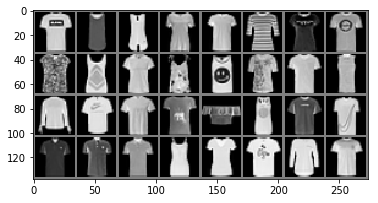

In [28]:
print(subset.shape)
out = torchvision.utils.make_grid(subset[:32])
print(out.shape)
imshow(out.add(0.5))

In [24]:
len(subset)

6000

In [14]:
dataloader = torch.utils.data.DataLoader(subset, batch_size=64,
                                          shuffle=False, num_workers=int(10))

In [15]:
x = next(iter(dataloader))

In [16]:
x.size()

torch.Size([64, 3, 32, 32])

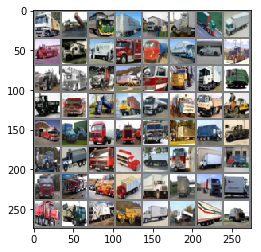

In [17]:
out = torchvision.utils.make_grid(x)
imshow(out)